In [ ]:
from financials_loader import FinancialsLoader
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

msft_fl = FinancialsLoader("MSFT")

msft_cashflow = msft_fl.load_cashflow()

msft_cashflow.T

In [168]:
msft_cashflow = msft_cashflow.set_index('Fiscal year ends in June. USD in millions except per share data.').T
msft_cashflow.index.rename('Timestamp', inplace=True)
msft_cashflow.index = pd.to_datetime(msft_cashflow.index, format='%Y-%M')
msft_cashflow

Fiscal year ends in June. USD in millions except per share data.,Cash Flows From Operating Activities,Net income,Depreciation & amortization,Investment/asset impairment charges,Investments losses (gains),Deferred income taxes,Stock based compensation,Change in working capital,Accounts receivable,Inventory,...,Other financing activities,Net cash provided by (used for) financing activities,Effect of exchange rate changes,Net change in cash,Cash at beginning of period,Cash at end of period,Free Cash Flow,Operating cash flow,Capital expenditure,Free cash flow
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:06:00,NaN,18760.0,2673.0,NaN,-208.0,-220.0,1891.0,30035.0,-2238.0,NaN,...,-981.0,-13291.0,-39.0,-571.0,6076.0,5505.0,NaN,24073.0,-1977.0,22096.0
2011-01-01 00:06:00,NaN,23150.0,2766.0,NaN,-362.0,2.0,2166.0,-3003.0,-1451.0,-561.0,...,-40.0,-8376.0,103.0,4105.0,5505.0,9610.0,NaN,26994.0,-2355.0,24639.0
2012-01-01 00:06:00,NaN,16978.0,2967.0,6193.0,-200.0,954.0,2244.0,35930.0,-1156.0,184.0,...,NaN,-9408.0,-104.0,-2672.0,9610.0,6938.0,NaN,31626.0,-2305.0,29321.0
2013-01-01 00:06:00,NaN,21863.0,3755.0,NaN,80.0,-19.0,2406.0,42878.0,-1807.0,-802.0,...,-10.0,-8148.0,-8.0,-3134.0,6938.0,3804.0,NaN,28833.0,-4257.0,24576.0
2014-01-01 00:06:00,NaN,22074.0,5212.0,NaN,-109.0,-331.0,2446.0,44949.0,-1120.0,-161.0,...,461.0,-8394.0,-139.0,4865.0,3804.0,8669.0,NaN,32231.0,-5485.0,26746.0
2015-01-01 00:06:00,NaN,12193.0,5957.0,7498.0,-443.0,224.0,2574.0,46585.0,1456.0,-272.0,...,4843.0,-9080.0,-73.0,-3074.0,8669.0,5595.0,NaN,29080.0,-5944.0,23136.0
2016-01-01 00:06:00,NaN,16798.0,6622.0,630.0,-223.0,332.0,2668.0,54996.0,-530.0,600.0,...,6826.0,-8393.0,-67.0,915.0,5595.0,6510.0,NaN,33325.0,-8343.0,24982.0
2017-01-01 00:06:00,NaN,21204.0,8778.0,NaN,-2073.0,-3296.0,3266.0,69363.0,-925.0,50.0,...,-5153.0,8408.0,19.0,1153.0,6510.0,7663.0,NaN,39507.0,-8129.0,31378.0
2018-01-01 00:06:00,NaN,16571.0,10261.0,NaN,-2212.0,13040.0,3940.0,2284.0,-3862.0,-465.0,...,-8295.0,-33590.0,50.0,4283.0,7663.0,11946.0,NaN,43884.0,-11632.0,32252.0


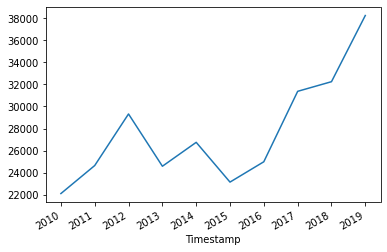

In [170]:
msft_cashflow['Free cash flow'].plot()

In [171]:
import yfinance as yf
from pandas import DataFrame as df
from pandas_datareader import data as pdr

msft = yf.Ticker("MSFT")

msft_ohlc_df = msft.history(period="max", interval='1wk', start='2010-01-01', end='2019-01-01')
msft_ohlc_df.index = pd.to_datetime(msft_ohlc_df.index, format='%Y-%M-%d')
msft_ohlc_df['Open']

Date
2010-01-01     23.97
2010-01-08     23.70
2010-01-15     24.33
2010-01-22     23.48
2010-01-29     23.40
               ...  
2018-11-30    108.49
2018-12-07    106.21
2018-12-14    106.09
2018-12-21     99.60
2018-12-28    100.05
Name: Open, Length: 506, dtype: float64

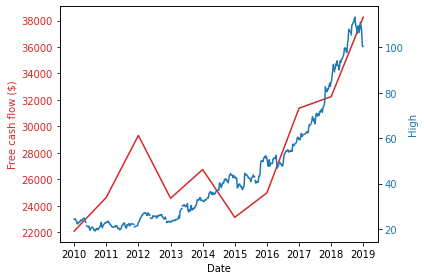

In [172]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Free cash flow ($)', color=color)
ax1.plot(msft_cashflow.index, msft_cashflow['Free cash flow'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('High', color=color)  # we already handled the x-label with ax1
ax2.plot(msft_ohlc_df.index, msft_ohlc_df['High'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [166]:
import plotly.graph_objects as go

df = msft_ohlc_df
fig = go.Figure(data=go.Ohlc(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'close': array([23.84, 24.23, 23.49, ..., 99.48, 99.16, 99.54]),
              'high': array([ 24.34,  24.34,  24.45, ..., 107.08, 100.94, 100.36]),
              'low': array([23.63, 23.41, 23.48, ..., 96.81, 92.08, 97.53]),
              'open': array([ 23.97,  23.7 ,  24.33, ..., 106.09,  99.6 , 100.05]),
              'type': 'ohlc',
              'x': array([datetime.datetime(2010, 1, 1, 0, 0),
                          datetime.datetime(2010, 1, 8, 0, 0),
                          datetime.datetime(2010, 1, 15, 0, 0), ...,
                          datetime.datetime(2018, 12, 14, 0, 0),
                          datetime.datetime(2018, 12, 21, 0, 0),
                          datetime.datetime(2018, 12, 28, 0, 0)], dtype=object)}],
    'layout': {'template': '...'}
})